In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.colors as colors
import matplotlib.cm as cmx
from skimage.io import imread,imsave
from skimage import exposure
import os
import warnings
import pims
import trackpy as tp
import pandas as pd
from pandas import DataFrame, Series  # for convenience
%matplotlib inline

In [2]:
def checkIfExistsAndCreateIfNeeded(folderPath):
    if not os.path.exists(folderPath):
        os.makedirs(folderPath)

In [3]:
def subdirs(path):
    for entry in os.scandir(path):
        if not entry.name.startswith('.') and entry.is_dir():
            yield entry.name

## Use the TrackPy library to track beads

In [14]:
phiName = 'Phi0'
basePath = '/Volumes/Elements/romeo/subtracted/180723/Serie_5/pressure80mbar/'
baseSavePath = '/Volumes/Elements/romeo/pythonAnalysis/180723/Serie_5/pressure80mbar/'

checkIfExistsAndCreateIfNeeded(baseSavePath)
fps = 50
dt = 1/fps #in seconds
umPerPix = 17.8/40
phiPath = os.path.join(basePath, phiName)

In [15]:
#tracking parameters
featSize = 7
maxDist = 35
minTrajLength = 100
myMinMass = 5e4
memoryParam = 3
threshPercent = 99

In [16]:
for phiName in subdirs('/Volumes/Elements/romeo/subtracted/180723/Serie_5/pressure80mbar/'):
    print(phiName)
    #define path
    phiPath = os.path.join(basePath, phiName)
    phiSavePath = os.path.join(baseSavePath, phiName)
    checkIfExistsAndCreateIfNeeded(phiSavePath)
    saveTracksName = 'Tracks_' + phiName + '.csv'
    saveTracksPath =  os.path.join(phiSavePath, saveTracksName)
    saveSpeedName= 'Speed_' + phiName + '.csv'
    saveSpeedPath =  os.path.join(phiSavePath, saveSpeedName)
    saveFigureName = 'Tracks_' + phiName + '.png'
    saveFigurePath =  os.path.join(phiSavePath, saveFigureName)
    
    #read in images
    framesPath = os.path.join(phiPath, '*.png')
    frames = pims.ImageSequence(framesPath)
    
    #track
    f = tp.batch(frames, featSize, minmass=myMinMass, separation=2*featSize) #topn=2
    t = tp.link_df(f, maxDist, memory=memoryParam)
    t1 = tp.filter_stubs(t, minTrajLength)
    
    #plot figure with trajectories
    plt.figure()
    tp.plot_traj(t1);
    ax.set_xlim(0, frames.frame_shape[1])
    ax.set_ylim(0, frames.frame_shape[0])
    
    #calculate speed and convert data from pix to microns, and from frames to seconds
    data = pd.DataFrame()
    for item in set(t.particle):
        sub = t1[t1.particle==item]
        vxVec = np.diff(sub.x)/np.diff(sub.frame)*umPerPix/fps
        vyVec = np.diff(sub.y)/np.diff(sub.frame)*umPerPix/fps
        for x, y, vx, vy, frame in zip(sub.x[:-1], sub.y[:-1], vxVec, vyVec, sub.frame[:-1],):
            data = data.append([{'vx': vx, 
                                 'vy': vy, 
                                 'x': x*umPerPix,
                                 'y': y*umPerPix,
                                 'frame': frame,
                                 'time': frame*dt,
                                 'particle': item,
                                }]) 

    #save data
    t1.to_csv(saveTracksPath, sep='\t')
    data.to_csv(saveSpeedPath, sep='\t')
    
    #plot the data
    fig, axs = plt.subplots(2, 2, figsize=(15,10))

    cm = plt.get_cmap('jet') 
    cNorm  = colors.Normalize(vmin=0, vmax=np.max(data.frame.values))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap= cm)

    for item in set(t1.particle):
        sub = t1[t1.particle==item]
        colorVal = scalarMap.to_rgba(sub.frame.values-sub.frame.values[0])
        axs[0,0].plot(sub.x, sub.y)
        axs[0,1].plot(sub.frame.values, sub.y.values)
        axs[1,1].plot(sub.frame.values[:]-sub.frame.values[0], sub.x)
        axs[1,2].plot(sub.frame.values[:]-sub.frame.values[0], sub.y)

    axs[0,0].set_xlabel('x (um)')
    axs[0,0].set_ylabel('y (um)')

    axs[0,1].set_xlabel('t (s)')
    axs[0,1].set_ylabel('y (um)')

    axs[1,1].set_xlabel('t-t0 (s)')
    axs[1,1].set_ylabel('x (um)')

    axs[1,2].set_xlabel('t-t0 (s)')
    axs[1,2].set_ylabel('y (um)')

    fig.tight_layout()
    plt.show()
    fig.savefig(saveFigurePath)

Frame 260: 5 features


KeyboardInterrupt: 

In [7]:
phiSavePath = os.path.join(baseSavePath, phiName)
checkIfExistsAndCreateIfNeeded(phiSavePath)

saveTracksName = 'Tracks_' + phiName + '.csv'
saveTracksPath =  os.path.join(phiSavePath, saveTracksName)
saveSpeedName= 'Speed_' + phiName + '.csv'
saveSpeedPath =  os.path.join(phiSavePath, saveSpeedName)
saveFigureName = 'Tracks_' + phiName + '.png'
saveFigurePath =  os.path.join(phiSavePath, saveFigureName)

In [11]:
framesPath = os.path.join(phiPath, '*.png')
frames = pims.ImageSequence(framesPath)

In [12]:
frames

<Frames>
Source: /Volumes/Elements/romeo/subtracted/180723/Serie_5/pressure80mbar/Phi0/*.png
Length: 2726 frames
Frame Shape: (1024, 1024)
Pixel Datatype: uint16

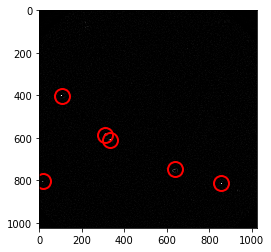

In [13]:
featSize = 7
figNb = 10
f1 = tp.locate(frames[figNb], featSize, minmass=5e4, separation=2*featSize)
plt.figure()  # make a new figure
tp.annotate(f1, frames[figNb]);

Frame 2725: 5 trajectories present.


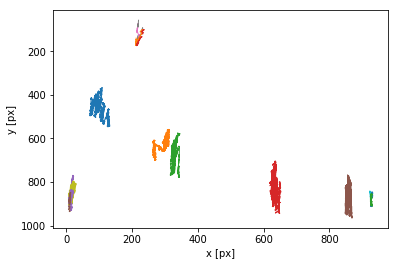

(0, 1024)

In [28]:
f = tp.batch(frames, featSize, minmass=myMinMass, separation=2*featSize) #topn=2
t = tp.link_df(f, maxDist, memory=memoryParam)
t1 = tp.filter_stubs(t, minTrajLength)
plt.figure()
tp.plot_traj(t1);
ax.set_xlim(0, frames.frame_shape[1])
ax.set_ylim(0, frames.frame_shape[0])

In [29]:
data = pd.DataFrame()
for item in set(t.particle):
    sub = t1[t1.particle==item]
    vxVec = np.diff(sub.x)/np.diff(sub.frame)
    vyVec = np.diff(sub.y)/np.diff(sub.frame)
    for x, y, vx, vy, frame in zip(sub.x[:-1], sub.y[:-1], vxVec, vyVec, sub.frame[:-1],):
        data = data.append([{'vx': vx, 
                             'vy': vy, 
                             'x': x,
                             'y': y,
                             'frame': frame,
                             'time': frame*dt,
                             'particle': item,
                            }]) 


In [ ]:
t1.to_csv(saveTracksPath, sep='\t')
data.to_csv(saveSpeedPath, sep='\t')

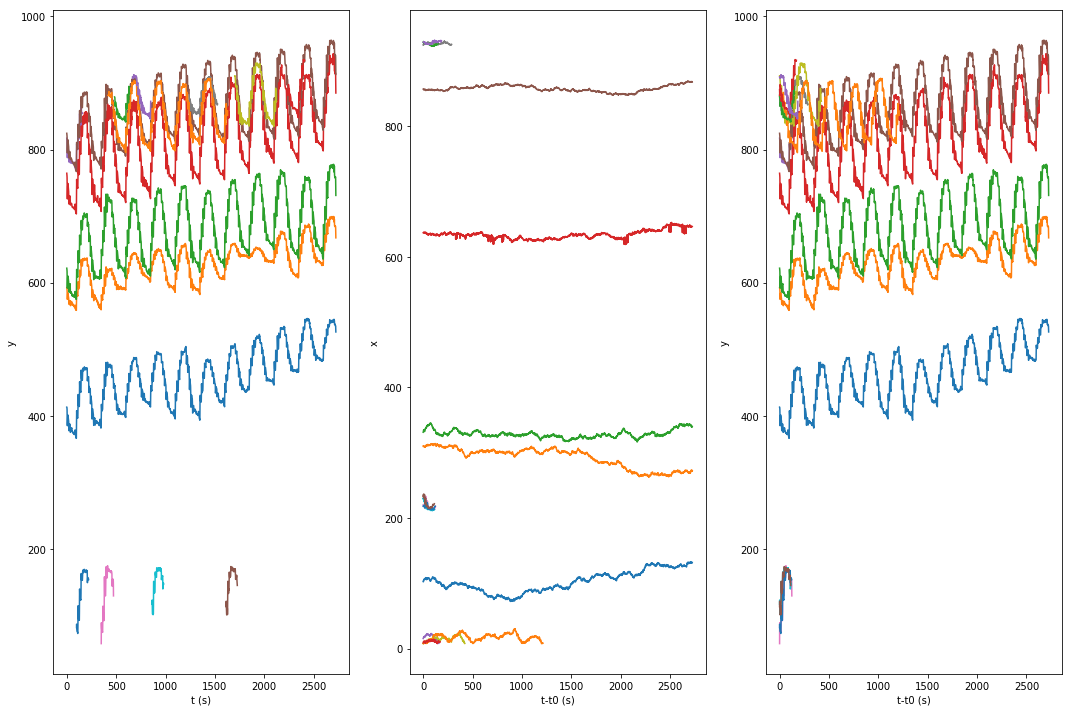

NameError: name 'saveFigurePath' is not defined

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))

cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=np.max(data.frame.values))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap= cm)

for item in set(t1.particle):
    sub = t1[t1.particle==item]
    colorVal = scalarMap.to_rgba(sub.frame.values-sub.frame.values[0])
    axs[0,0].plot(sub.x, sub.y)
    axs[0,1].plot(sub.frame.values, sub.y.values)
    axs[1,1].plot(sub.frame.values[:]-sub.frame.values[0], sub.x)
    axs[1,2].plot(sub.frame.values[:]-sub.frame.values[0], sub.y)

axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('y')
    
axs[0,1].set_xlabel('t (s)')
axs[0,1].set_ylabel('y')

axs[1,1].set_xlabel('t-t0 (s)')
axs[1,1].set_ylabel('x')

axs[1,2].set_xlabel('t-t0 (s)')
axs[1,2].set_ylabel('y')

fig.tight_layout()
plt.show()
fig.savefig(saveFigurePath)